In [12]:
%pylab inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')

Populating the interactive namespace from numpy and matplotlib


pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy


In [13]:
import gzip
import cPickle
from breze.learn.utils import tile_raster_images
from breze.learn.data import one_hot
from breze.learn.base import cast_array_to_local_type
from main import ProbabilisticModel, VariationalBayes

# load MNIST data

In [14]:
datafile = '../mnist.pkl.gz'
# Load data.                                                                                                   

with gzip.open(datafile,'rb') as f:                                                                        
    train_set, val_set, test_set = cPickle.load(f)                                                       

X, Z = train_set                                                                                               
VX, VZ = val_set
TX, TZ = test_set

Z = one_hot(Z, 10)
VZ = one_hot(VZ, 10)
TZ = one_hot(TZ, 10)

image_dims = 28, 28

X, Z, VX, VZ, TX, TZ = [cast_array_to_local_type(i) for i in (X, Z, VX,VZ, TX, TZ)]

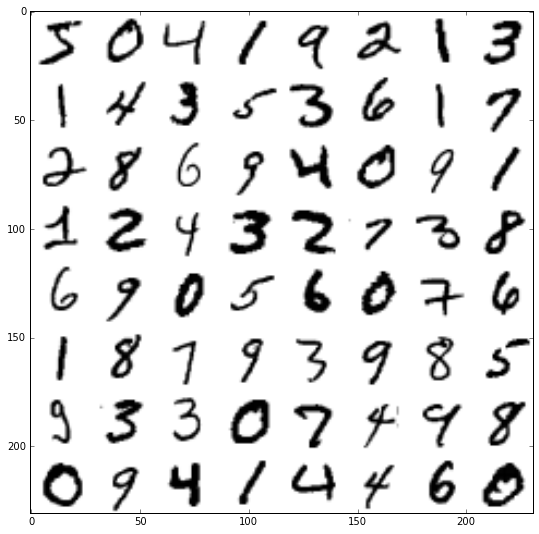

In [15]:
fig, ax = plt.subplots(figsize=(9, 9))

img = tile_raster_images(X[:64], image_dims, (8, 8), (1, 1))
ax.imshow(img, cmap=cm.binary)

# General Procedure, Probabilistic Modeling

## Clarify Data interface

### target distribution

in "supervised" setting, parameters are function of inputs

hereby, old parameters are gone, while function_approximator parameters are the new and only ones, further inputs are added.

## regularizing

Bayesian Treatment of Parameters

#  meta graph ?!

m1 = distribution_approximator
m2 = function_approximator
...

{outputs : (m1, 'outputs'),
(m1, 'parameters') : (m2, inputs) }

# modelling autoencoder outline

1. target = Distribution_Approximator(latent, parameters)

1. Bayesian modelling of latent variables
    1. latent_posterior = Distribution_Approximator(target, parameters) # autoencoding part
    1. latent_prior = Distribution_Approximator(parameters)

In [ ]:
# this syntax must support automerging of certain keys - maybe set this flags before
# further, if e.g. 'latent' would be 'parameters' then the old key set should be deleted.
# maybe set another list of keys which should work like these (usually inputs, outputs, parameters)

target_distribution['latent'] = latent_posterior

# variational setting further requires to replace prior random variable (must follow approximate posterior distribution):
latent_prior['RV'] = latent_posterior  # this syntax seems most adequat if RV.P has an extra reference within the graph,
# or keep care, that in this special setting, .P is preserved properly (makes this sense?)

the total model is a normal Variational Lower Bound model, with all parameters above merged

# modelling autoencoder outline 2

variational_bayes ~ probabilistic pipe 

# fit

In [16]:
max_passes = 250
max_iter = max_passes * X.shape[0] / batch_size
n_report = X.shape[0] / batch_size

stop = climin.stops.AfterNIterations(max_iter)
pause = climin.stops.ModuloNIterations(n_report)

for i, info in enumerate(m.powerfit((X,), (VX,), stop, pause)):
    print i, info['loss'], info['val_loss']


numpy.ndarray